<a href="https://colab.research.google.com/github/imyoungchae/YoungChaeSon/blob/main/%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98_Day13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#이진트리
- 편향 이진트리는 메모리 낭비가 심함
- 일반적인 경우의 이진트리의 노드는 키와 두개의 레퍼런스 필드 즉, left와 right를 가진다


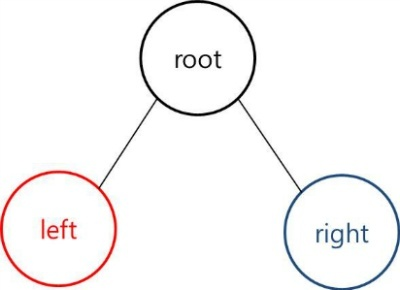


1. 전위순회: root->left->right

부모노드->왼쪽 자식 노드->오른쪽 자식 노드

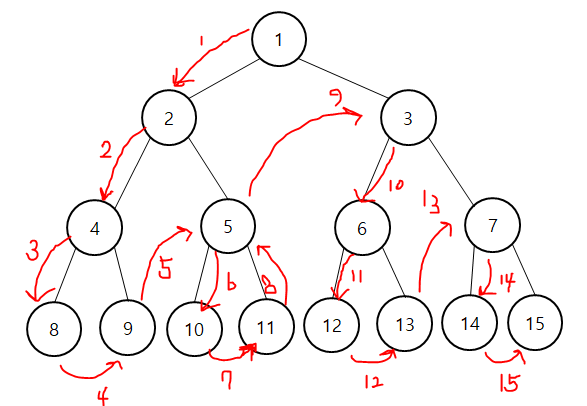

2.  중위순회: left->root->right

왼쪽 자식 노드 -> 부모 노드 -> 오른쪽 자식 노드

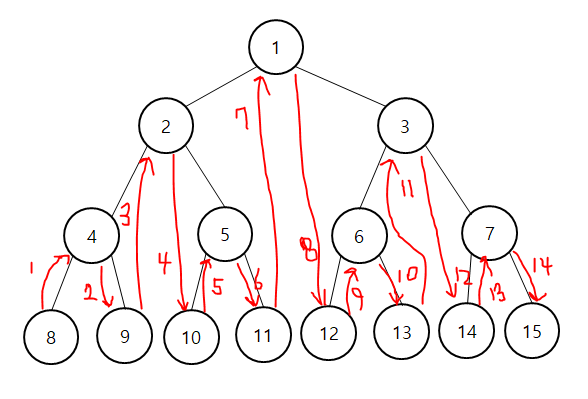


3. 후위순회: left-> right->root

왼쪽 자식 노드 -> 오른쪽 자식 노드->부모 노드

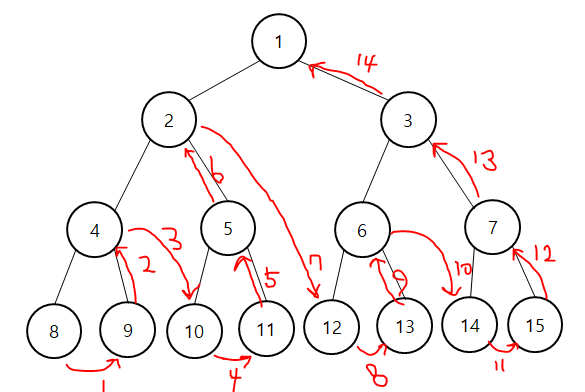

파일명: binary_tree.py

In [ ]:
class Node:
    def __init(self,item,left=None,right=None):
        self.item=item
        self.left=left
        self.right=right

class BinaryTree:
    def __init__(self):
        self.root=None

    def preorder(self,n): # 전위순회
        if n != None:
            print(str(n.item),'',end='')
            if n.left:
                self.preorder(n.left)
            if n.right:
                self.preorder(n.right)

    def inorder(self,n): # 중위순회
        if n != None:
            if n.left:
                self.inorder(n.left)
            print(str(n.item),'',end='')
            if n.right:
                self.inorder(n.right)

    def postorder(self,n): # 후위순회
        if n != None:
            if n.left:
                self.postorder(n.left)
            if n.right:
                self.postorder(n.right)
            print(str(n.item),'',end='')

    def levelorder(self,root):
        q=[]
        q.append(root)
        while q:
            t=q.pop(0)
            print(t.item,'',end='')
            if t.left != None:
                q.append(t.left)
            if t.right != None:
                q.append(t.right)

    def height(self,root):
        if root == None:
            return 0
        return max(self.height(root,left),self.height(root.right))+1

    def size(self,root):
        if root is None:
            return 0
        else:
            return 1+self.size(root.left)+self.size(root.right)

파일명: main.py

In [ ]:
from binary_tree import BinaryTree, Node
if __name__=='__main__':
    t=BinaryTree()
    n1=Node(100)
    n2=Node(200)
    n3=Node(300)
    n4=Node(400)
    n5=Node(500)
    n6=Node(600)
    n7=Node(700)
    n8=Node(800)
    n1.left=n2
    n1.right=n3
    n2.left=n4
    n2.right=n5
    n3.left=n6
    n3.right=n7
    n4.left=n8
    t.root=n1
    print('트리 높이: ',t.height(t.root))
    print('전위 순회:\t ',end='')
    t.preorder(t.root)
    print('중위 순회:\t ',end='')
    t.inorder(t.root)
    print('후위 순회:\t ',end='')
    t.postorder(t.root)
    print('레벨 순회:\t ',end='')
    t.levelorder(t.root)

#이진힙
- 이진힙은 우선순위큐를 구현하는 가장 기본적인 자료구조
- 우선순위큐:  들어간 순서에 상관없이 우선순위가 높은 데이터가 먼저 나오는 것
- 큐: 먼저 삽입된 항목이 우선순위가 높음
- 이진힙: 완전 이진 트리로서 부모의 우선순위가 자식의 우선순위보다 높은 자료구조,완전 이진 트리는 모든 레벨의 노드가 채워져 있어야 하며, 마지막 레벨은 왼쪽부터 차 있어야 함


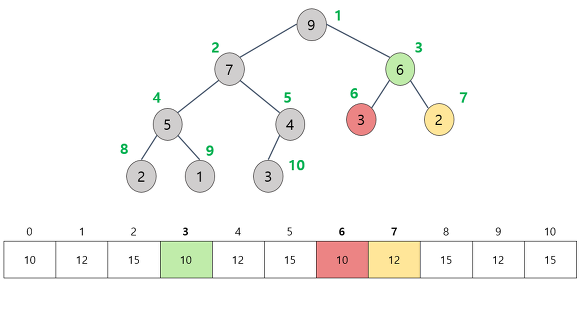

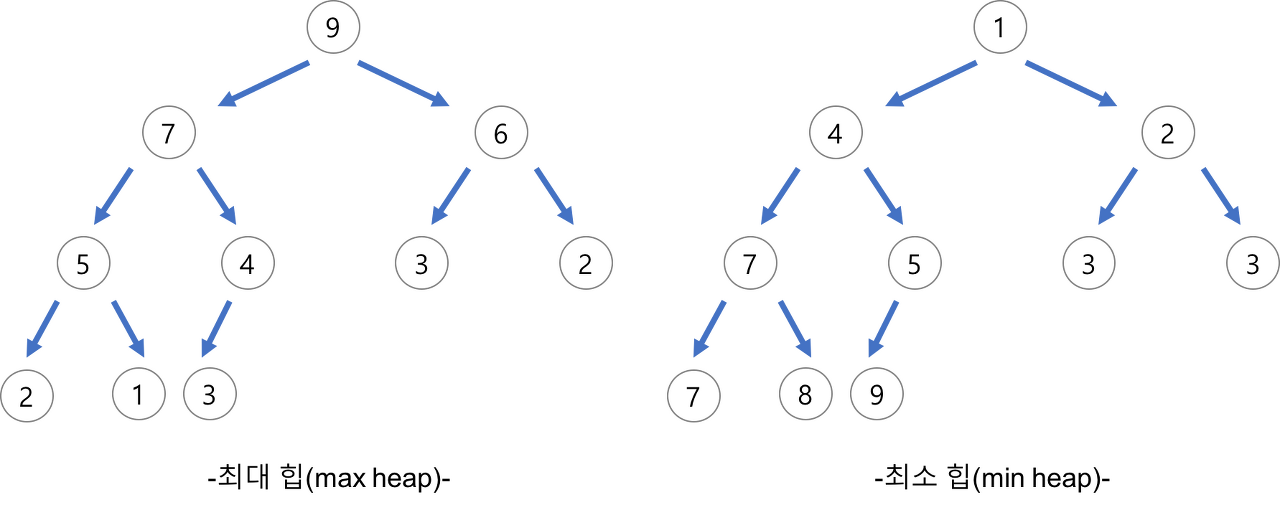

1. 최대힙(max heap)의 삽입
- 힙에 새로운 요소가 들어오면, 일단 새로운 노드를 힙의 마지막 노드에 이어서 삽입한다
- 새로운 노드를 부모 노드들과 교환해서 힙의 성질을 만족시킨다
- 아래의 최대힙에 새로운 요소 8을 추가한다면?

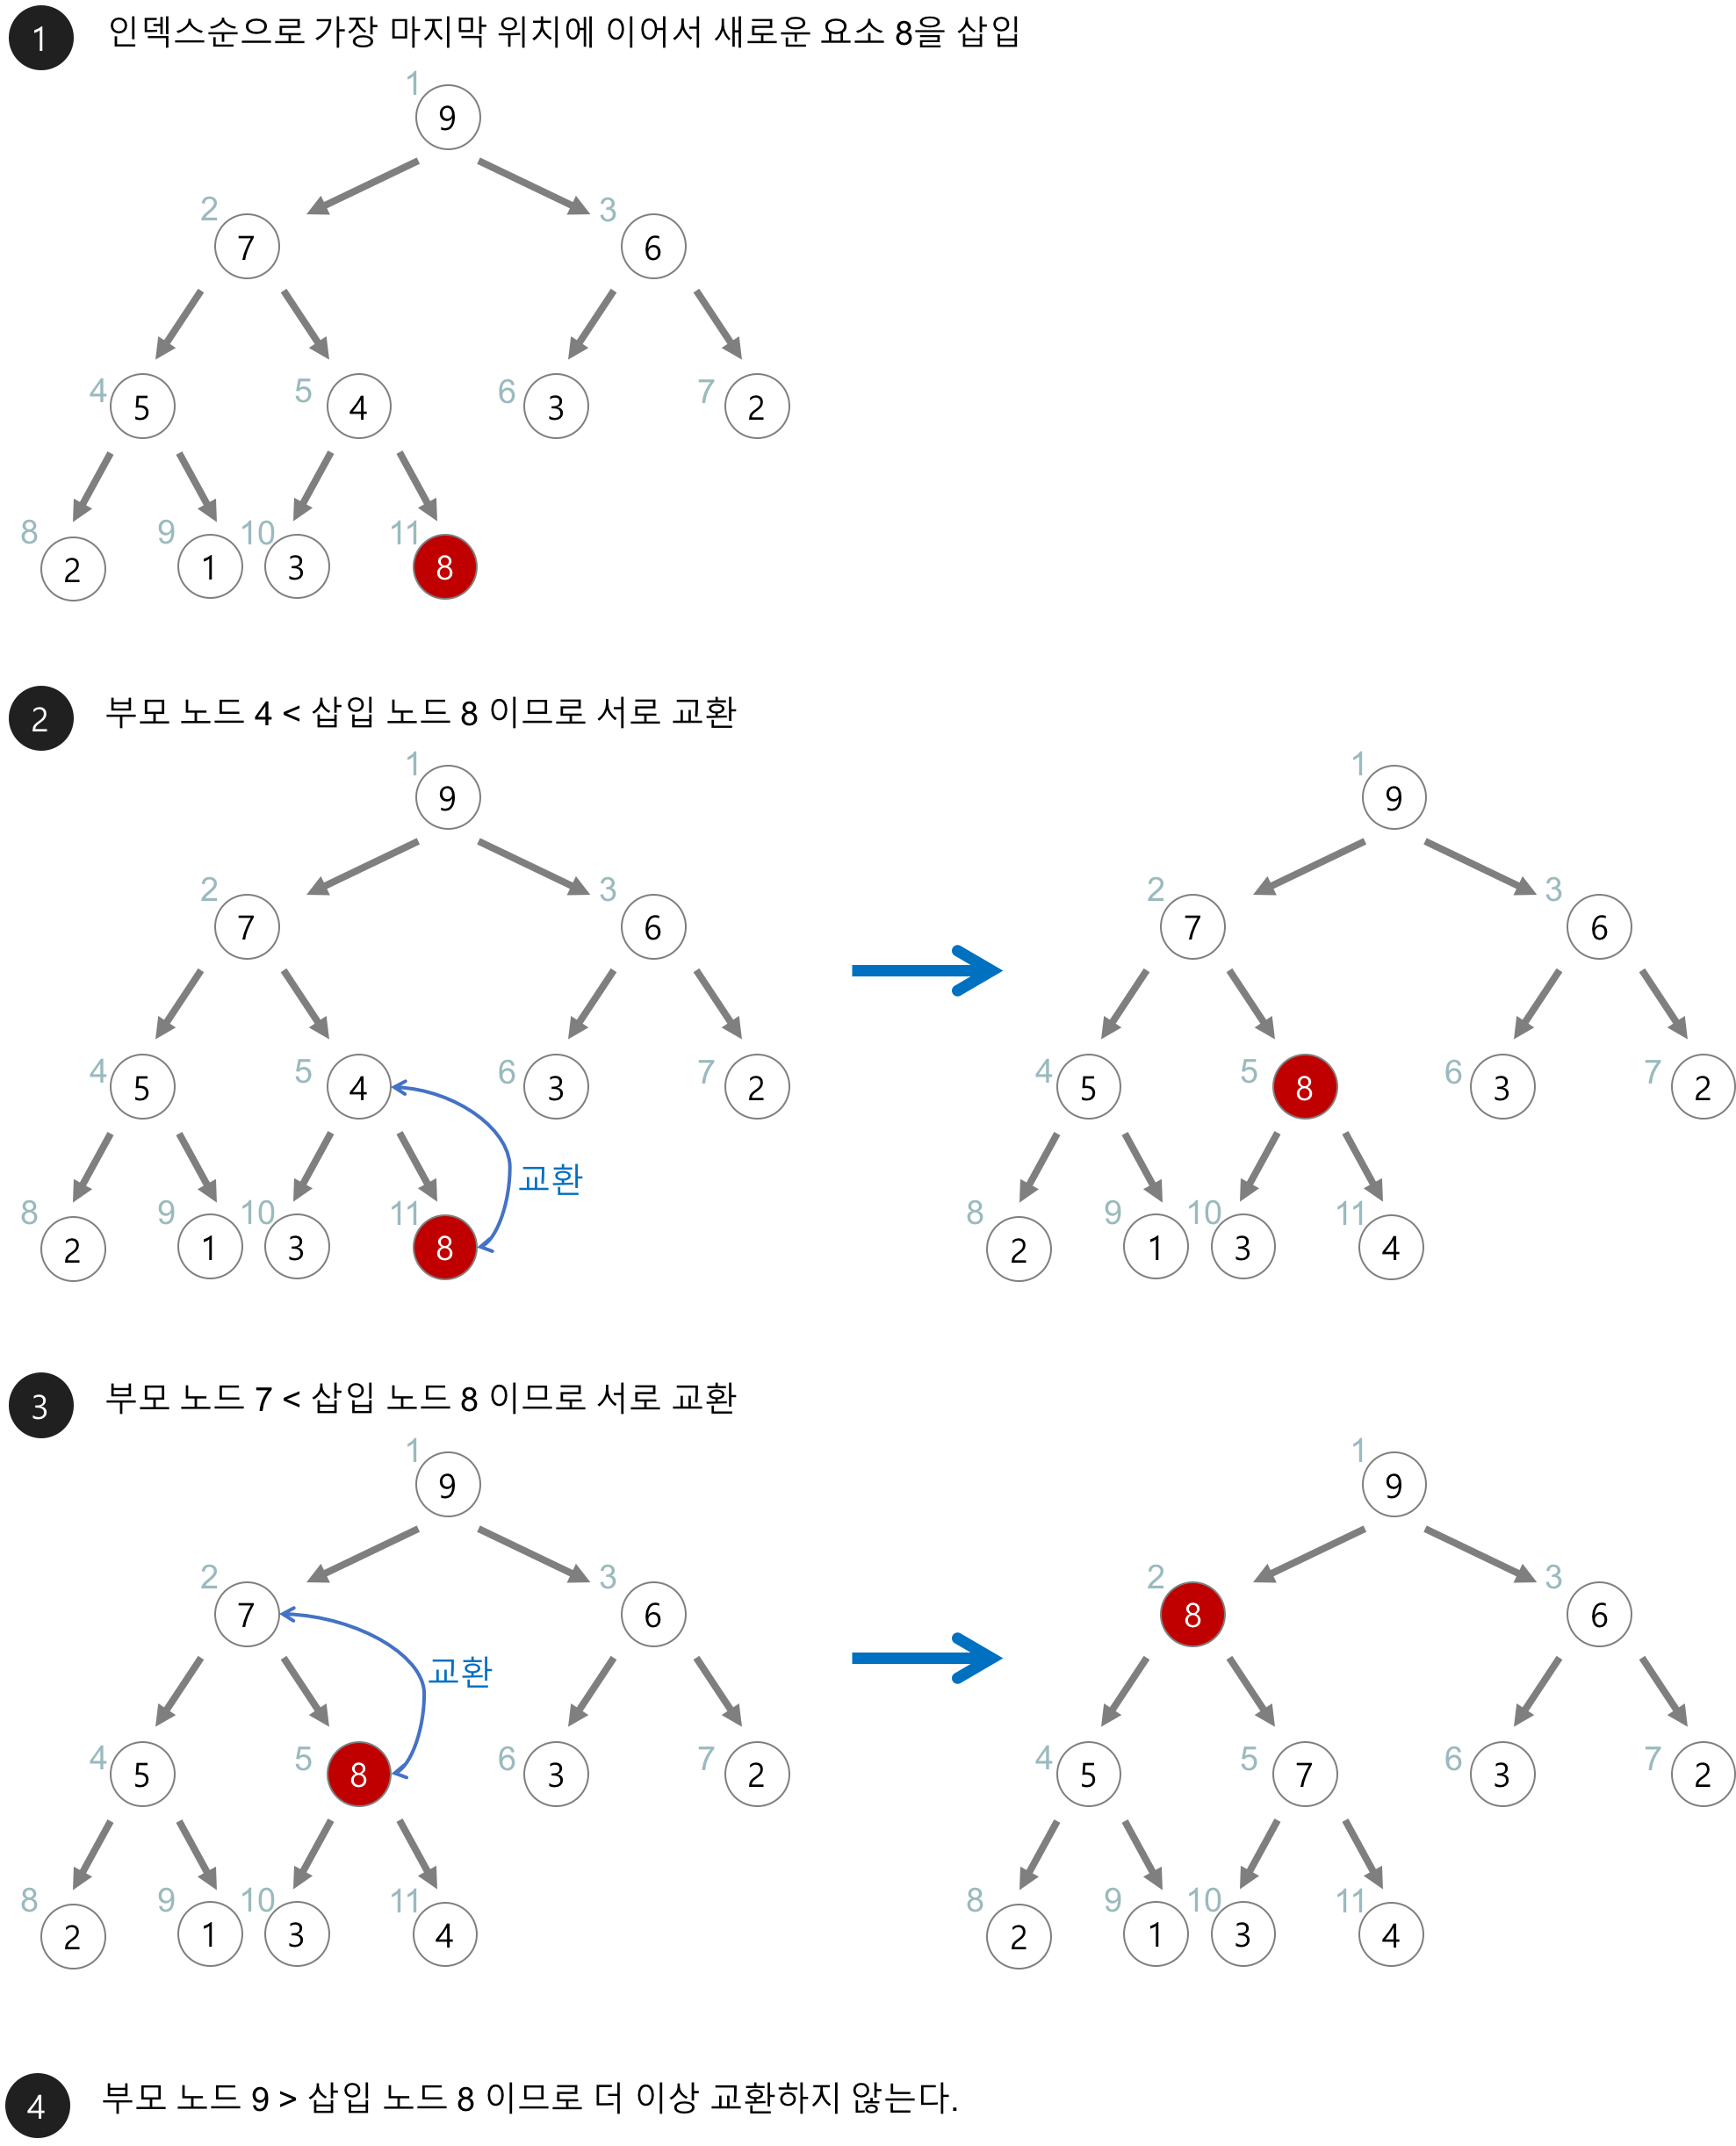

2. 최대힙(max heap)의 삭제
- 최대힙에서 최대값은 루트 노드이므로 루트 노드가 삭제된다
- 삭제된 루트 노드에는 힙의 마지막 노드를 가져온다
- 힙을 재구성한다

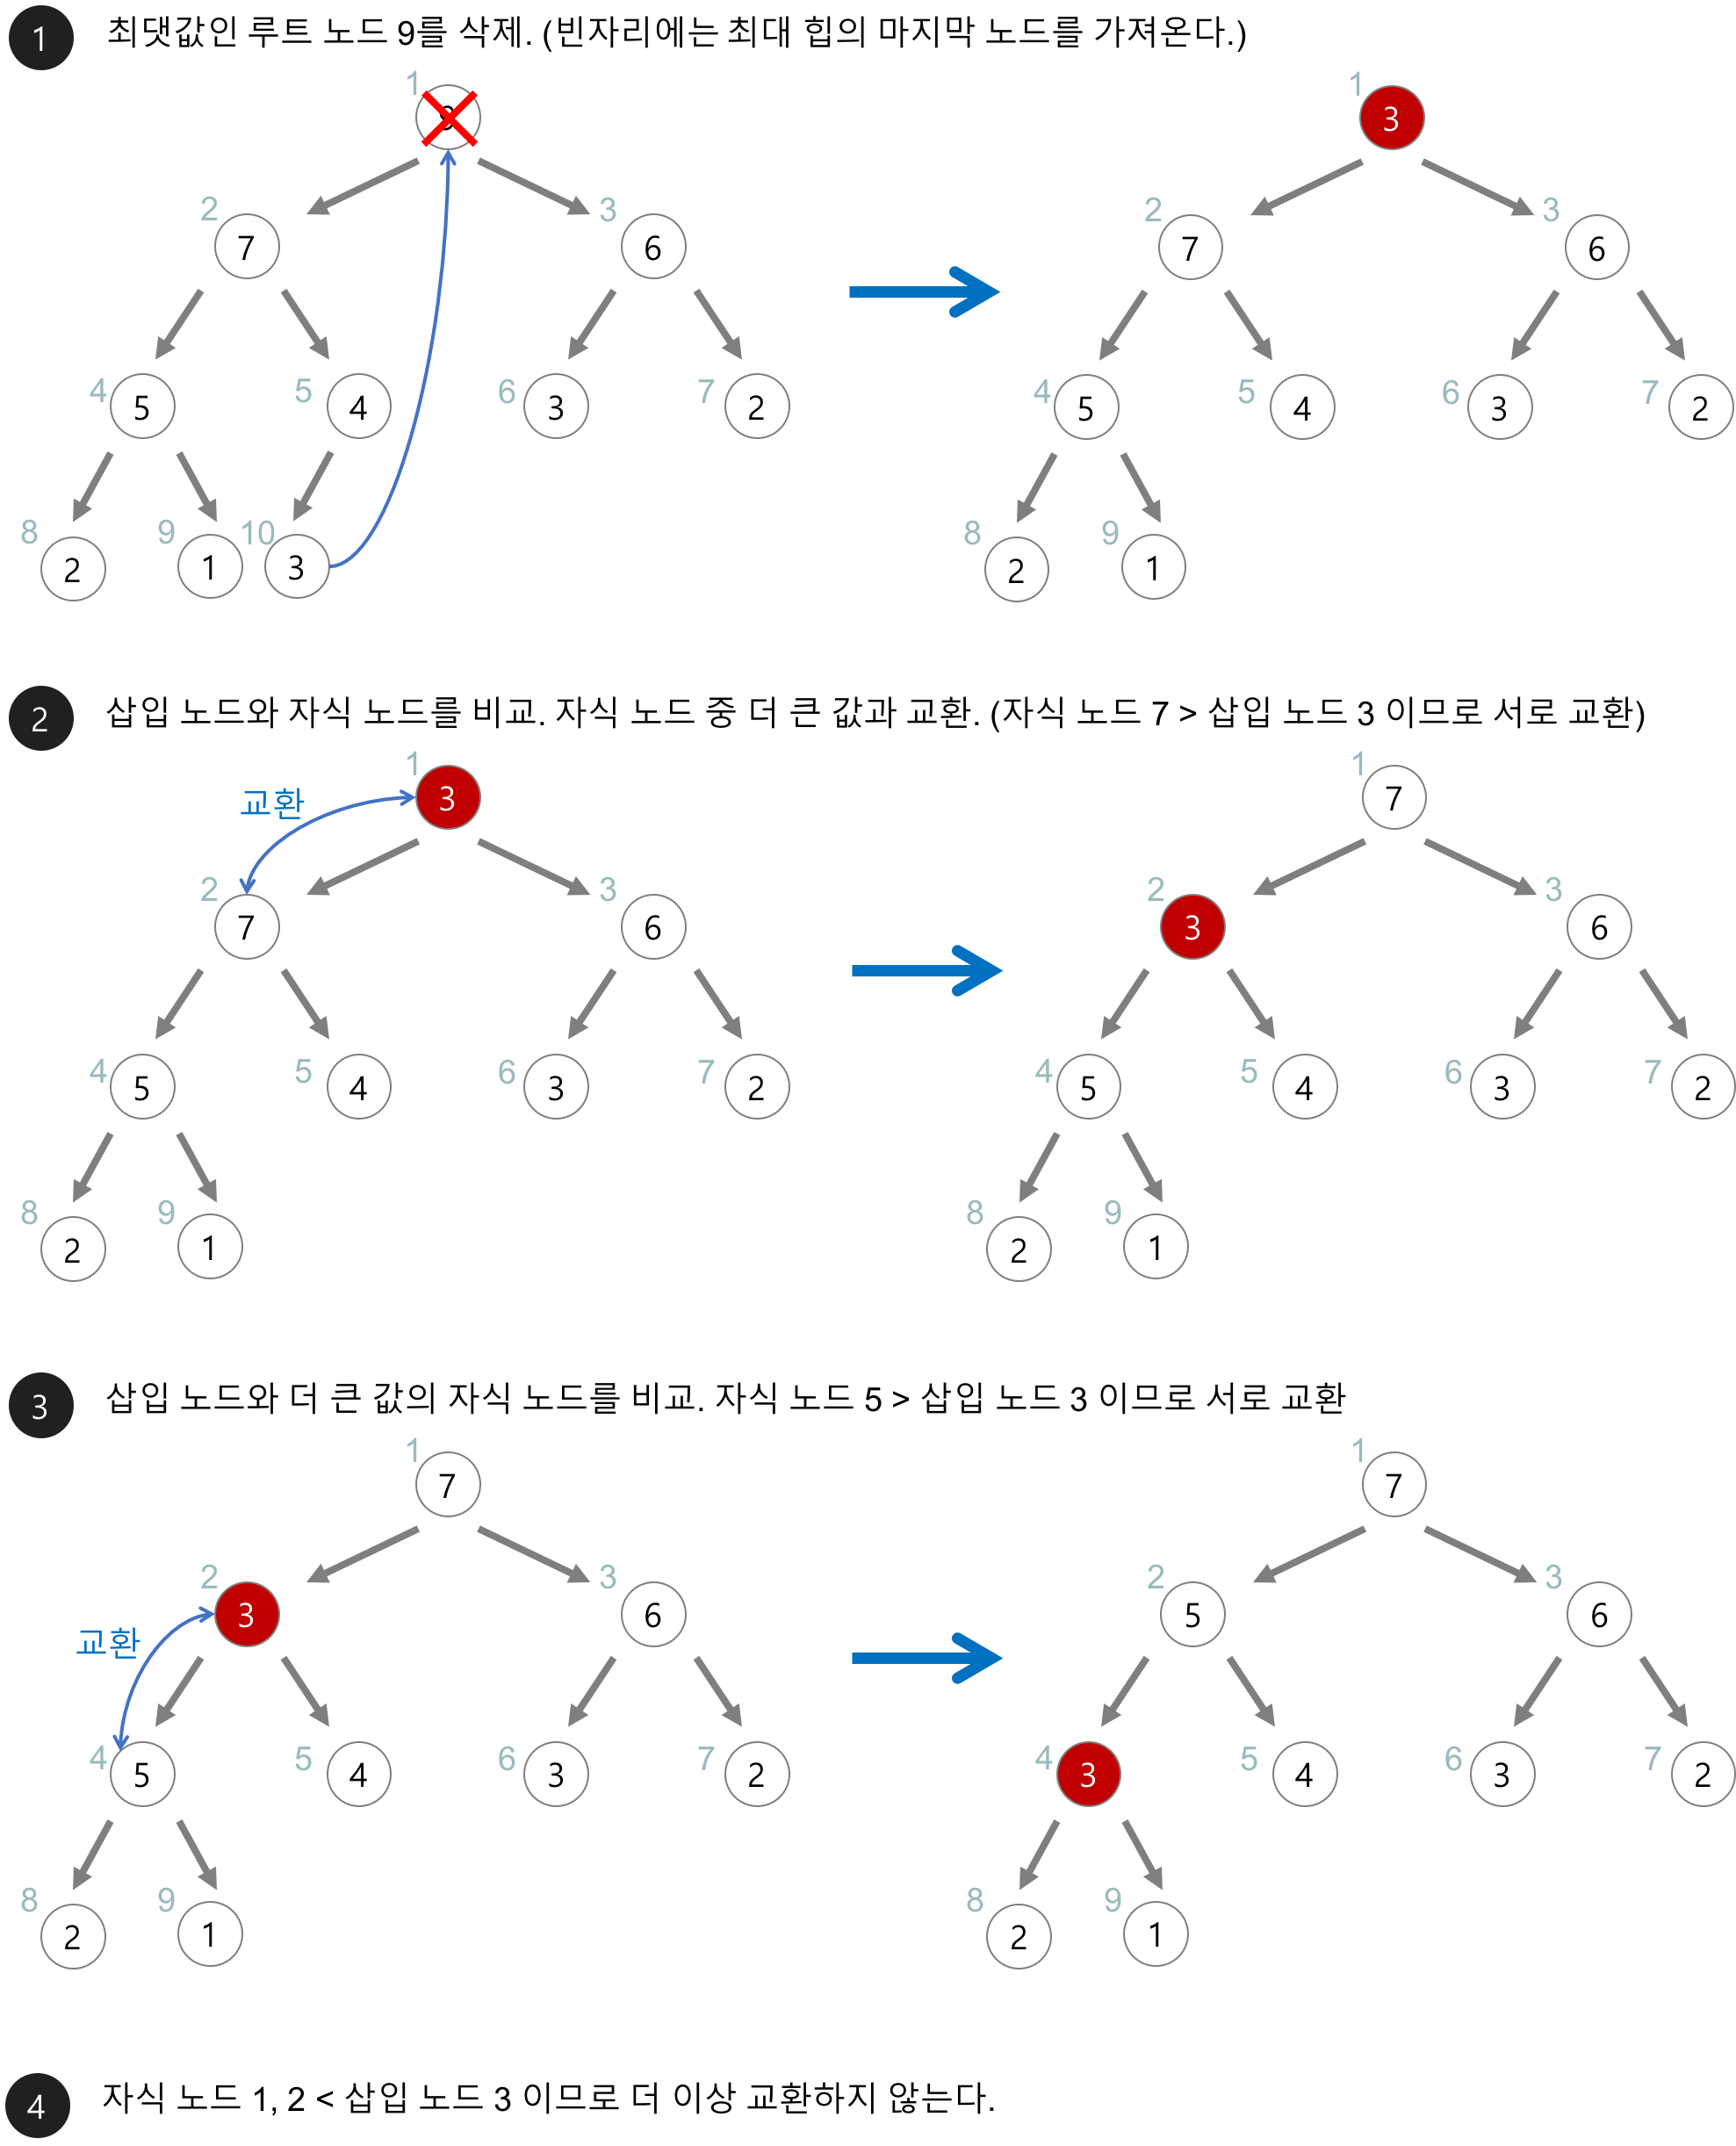

파일명: binary_heap.py

In [ ]:
class BHeap:
    def __init__(self,a): # 생성자
        self.a=a # a[0] 사용 안 함
        self.N=len(a)-1 # 힙의 항목 수

    def create_heap(self): # 초기 힙 만들기
        for i in range(self.N//2,0,-1):
            self.downheap(i)

    def insert(self,key_value):
        self.N += 1
        self.a.append(key_value) # 새로운 키(항목)를 맨 끝에 저장
        self.upheap(self.N)

    def delete_min(self):
        if self.N == 0:
            print('힙이 비어있음')
            return None
        minimum = self.a[1] # a[1]의 최소값을 minimum에 저장하여 리턴
        self.a[1],self.a[-1] = self.a[-1],self.a[1]
        del self.a[-1] # 힙의 마지막 항목 삭제
        self.N -= 1
        self.downheap(1) # 힙속성을 회복시키기 위해
        return minimum

    def downheap(self,i): # 힙 내려가며 힙속성 회복
        while 2*i <= self.N: # i의 왼쪽 자식이 힙에 있으면
            k = 2*i # k는 왼쪽 자식의 인덱스
            if k < self.N  and self.a[k][0] > self.a[k+1][0]: 
                k += 1
            if self.a[i][0] < self.a[k][0]:
                break
            self.a[i],self.a[k] = self.a[k],self.a[i]
            i=k # 자식 승자가 현재 노드가 되어 다시 반복하기 위해
      
    def upheap(self,j): # 힙 올라가며 힙속성 회복
        while j>1 and self.a[j//2][0] > self.a[j][0]:
            self.a[j],self.a[j//2] = self.a[j//2],self.a[j]
            j=j//2 # 부모가 현재 노드가 되어 다시 반복하기 위해

    def print_heap(self): # 힙 출력
        for i in range(1,self.N+1):
            print('[%2d' % self.a[i][0],self.a[i][1], ']',end='')
        print()

파일명: main.py

In [ ]:
from binary_heap import BHeap
if __name__=='__main__':
    a = [None]*1
    a.append([90,'watermelon'])
    a.append([80,'pear'])
    a.append([70,'melon'])
    a.append([50,'lime'])
    a.append([60,'mango'])
    a.append([20,'cherry'])
    a.append([30,'grape'])
    a.append([35,'orange'])
    a.append([10,'apricot'])
    a.append([15,'banana'])
    a.append([45,'lemon'])
    a.append([40,'kiwi'])
    b = BHeap(a)
    print('힙 만들기 전: ')
    b.print_heap()
    b.create_heap()
    print('최소힙: ')
    b.print_heap()
    print('최솟값 삭제 후')
    print(b.delete_min())
    b.print_heap()
    b.insert([5,'apple'])
    print('5 삽입 후')
    b.print_heap()